In [ ]:
!pip install gekko

## Methods & Imports

In [ ]:
import numpy as np #for Calculations
import warnings   #for warnings
from collections import Counter
from numpy.core.multiarray import where #for finding index
import math as math #for Infinite
import matplotlib.pyplot as plt #for ploting
import sympy as sp #for big M
import pandas as pd #for tables
from gekko import GEKKO #for inteager programing
from fractions import Fraction #for fraction output
from IPython.display import clear_output
print("Mohammad Erfan Dorak")
print("1-Normal Simplex with Matrix & gerphicaL\n"+"2-Normal Simplex with table\n"+"3-Big-M \n"+"4-Two Phase \n"+"5-Daul simplex\n"+"6-Inteager Prog \n"+"7-Sensitivity Analysis")
print("select your method:")
ravesh=int(input())     

Mohammad Erfan Dorak
1-Normal Simplex with Matrix & gerphicaL
2-Normal Simplex with table
3-Big-M 
4-Two Phase 
5-Daul simplex
6-Inteager Prog 
7-Sensitivity Analysis
select your method:
2


## **Normal Simplex with Matrix** (Revised Simplex)

------------------Revised Simplex---------------
Number of variables: 2
Number of constraints: 2
Maximize z = 
x_1 ,x_2 ,...2 1
which one is urs----> if no one:00
constraints:
x_1 ,x_2 ,...1 -1 10
x_1 ,x_2 ,...2 -1 40
----------------------------------------------------
TABLE 1
   x_1  x_2  x_3  x_4
Z -2.0 -1.0 -0.0 -0.0
     x_1  x_2  x_3  x_4
x_3  1.0 -1.0  1.0  0.0
x_4  2.0 -1.0  0.0  1.0
      x_3   x_4
RHS  10.0  40.0
   Optimal Value
Z              0
----------------------------------------------------
*** x_3 OUT & x_1 IN ***
TABLE 3
   x_1  x_2  x_3  x_4
Z  0.0 -3.0  2.0  0.0
     x_1  x_2  x_3  x_4
x_1  1.0 -1.0  1.0  0.0
x_4  0.0  1.0 -2.0  1.0
      x_1   x_4
RHS  10.0  20.0
   Optimal Value
Z           20.0
-----------------------------------------------------
*** x_4 OUT & x_2 IN ***
TABLE 4
   x_1  x_2  x_3  x_4
Z  0.0  0.0 -4.0  3.0
     x_1  x_2  x_3  x_4
x_1  1.0  0.0 -1.0  1.0
x_2  0.0  1.0 -2.0  1.0
      x_1   x_2
RHS  30.0  20.0
   Optimal Value
Z           80.0
--

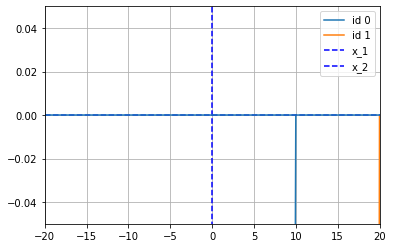

In [ ]:
if ravesh==1:
  warnings.filterwarnings("ignore")
  print("------------------Revised Simplex---------------")
  n=int(input("Number of variables: "))
  nx=n
  w=int(input("Number of constraints: "))
  print("Maximize z = ")
  b=[]
  A=[]
  #Goal function
  a = [float(x) for x in input("x_1 ,x_2 ,...").split()]
  urs=int(input("which one is urs----> if no one:0"))
  #URS variables
  if urs!=0 :
    urs=urs-1
    a.insert(urs,-a[urs])
    n=n+1
    nx=nx+1
  cons=[]
  #Constraints , RHS matrix & A matrix
  print("constraints:")
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    if urs!=0:
      sar.insert(urs,-sar[urs])
    cons = cons + [sar]
  for rhs in range(0,w):
    b=b+[[cons[rhs][n]]]
  for x in range(0,w):
    A=A+[cons[x][:-1]]
  print("----------------------------------------------------")
  A=np.array(A,dtype=float)
  b=np.array(b,dtype=float)
  # AI & C matrix
  I = np.eye(w)
  c = np.array(a,dtype=float)
  B=I
  xb=b
  AI=np.concatenate((A,I),axis=1)
  benz=AI
  manfic=np.multiply(c,-1)
  control=np.min(manfic)
  zarib=np.where(manfic==control)
  # B inverc & cB
  Binverse=np.linalg.inv(B)  #pinv
  cB=np.zeros(w)
  # Z
  z=np.concatenate((c,cB))
  benz2=z
  # name
  esmmotaghayer=[]
  payeii=[]
  for esm in range(1,len(benz2)+1):
    esmmotaghayer=esmmotaghayer+["x_"+str(esm)]
  payeii=esmmotaghayer[(n):]
  #Degeneracy in Z
  if (len(zarib[0])>1) and (control<0):
    print("-------------------((((Degeneracy)))--------------")
    sortedzarib=[[zarib[0][0]]]
    zarib=sortedzarib
  conter=1
  # PRINT FIRST TABLE
  print("TABLE",conter)
  print(pd.DataFrame([-z],index=["Z"],columns=esmmotaghayer))
  print(pd.DataFrame(AI, index=payeii,columns=esmmotaghayer))
  print(pd.DataFrame(np.transpose(xb), index=["RHS"],columns=payeii))
  print(pd.DataFrame(0, index=["Z"],columns=["Optimal Value"]))
  print("----------------------------------------------------")
  conter=conter+1
  #SOLVER
  while control<0 :
    ratio=np.array([])
    #Ratio Test
    ratiotest=[]
    for q in range(0 ,w):
      if AI[q][zarib][0]==0 or AI[q][zarib][0]<0:
        ratiotest=ratiotest+[math.inf] 
      else:
        ratiotest=ratiotest+[xb[q]/AI[q][zarib][0]] 
    ii=np.full((1,w),math.inf)
    # UNBOANDED Testing
    if (ratiotest==ii).all():
      print("###############(!!UNBOANDED!!)###############")
      break
    # Find the minimum Ratio 
    minratio=np.min(ratiotest)
    ratio=np.where(ratiotest==minratio)
    # Degeneracy in Ratio
    if len(ratio)>1:
      sortedratio=np.sort(ratiotest)
      if sortedratio[0]==sortedratio[1]:
        print("-------------------((((Degeneracy)))--------------")
        degen=np.array([])
        degen=sortedratio[0]
        ratiotest=degen
    ratio=np.where(ratiotest==minratio)
    # in & out
    for q in range(0 ,w):
      B[q][ratio[0]]=benz[q][zarib[0]]
      cB[ratio[0]]=benz2[zarib[0]]
    # Basic var & non basic var
    zzz=ratio[0][0]
    xxx=zarib[0][0]
    print("***",payeii[zzz],"OUT","&",esmmotaghayer[xxx],"IN","***")
    payeii[zzz]=esmmotaghayer[xxx]
    # B inverse
    Binverse=np.linalg.inv(B)
    # (B^-1) * A
    gheidi=np.matmul(Binverse,A)
    gheidi=np.around(gheidi,4)
    # cB * (B^-1)*A-c
    satrsefr1=np.matmul(cB,gheidi)-c
    # cB * (B^-1)
    satrsefr2=np.matmul(cB,Binverse)
    z=np.concatenate((satrsefr1,satrsefr2))
    z=np.around(z,4)
    control=np.min(z)
    zarib=np.where(z==control)
    # Degeneracy in Z
    if (len(zarib[0])>1) and (control<0):
      print("-------------------((((Degeneracy)))--------------")
      sortedzarib=[[zarib[0][0]]]
      zarib=sortedzarib
    # [(B^-1) * A ][(B^-1)]
    basicvar=[]
    basicvar=zarib[0]
    AI=np.concatenate((gheidi,Binverse),axis=1)
    AI=np.around(AI,4)
    xb=np.matmul(Binverse,b)
    final=np.matmul(cB,xb)
    infi=np.min(xb)
    if infi<0:
      print("###################!!INFEASIBLE!!###############")
      break
    conter=conter+1
    multy=0
    if (multy==0) and (np.sort(satrsefr1)[n-1]==0) and (len(zarib)>w):
      print("------((Non-unique optimal answer))------")
      control=-1
      multy=multy+1
    print("TABLE",conter)                                                 
    ztrns=np.transpose(z)
    #so simplex table is:------------------------------
    #               [esmmotaghayer]    RHS             |
    #   z :    [satrsefr1][satrsefr2][final]           |
    # [payeii]:[  gheidi ][Binverse ][  xb ]           |
    #--------------------------------------------------
    print(pd.DataFrame([ztrns],index=["Z"],columns=esmmotaghayer))
    print(pd.DataFrame(AI, index=payeii,columns=esmmotaghayer))
    print(pd.DataFrame(np.transpose(xb), index=["RHS"],columns=payeii))
    print(pd.DataFrame(final, index=["Z"],columns=["Optimal Value"]))
    nonuniqe=0
    print("-----------------------------------------------------")
  print("------------------------((DUAL))---------------------------")
  dual=[]
  payedoul=[]
  zx=0
  for esm in range(0,w):
    dual=dual+["y_"+str(esm)]
    zx=zx+1
  if nx>w :
    for esm in range(0,nx-w):
      payedoul=dual+["y_"+str(zx)]
      zx=zx+1
  else:
    payedoul=dual[:n]
  print(pd.DataFrame(np.transpose(satrsefr1),index=payedoul,columns=["RHS"]))
  print(pd.DataFrame(np.transpose(xb),index=["Z'"],columns=dual)) 
  print("z'=",final)
  dualmot=[x for x in esmmotaghayer if x not in payeii]
  print("---------------------((GeRpHiCaL))-----------------------")
  # JUST FOR 2 variables
  if n==2:
    plotfill1=[]
    plotfill2=[]
    conter2=0
    for plotha in range(0,w): # plot constraints
      if cons[plotha][2]==0:
        plt.plot([0,-cons[plotha][0]*-(1000)],[0,cons[plotha][1]*(-1000)])
        continue
      if cons[plotha][0]==0:
        line1=0
        line2=cons[plotha][2]/cons[plotha][1]
        line,=plt.plot([0,9999999], [line2,line2],label = 'id %s'%plotha)
        plotfill1=plotfill1+[[line1,0]]
        plotfill2=plotfill2+[[0,line2]]
        continue 
      else:
        line1=cons[plotha][2]/cons[plotha][0]
        plotfill1=plotfill1+[[line1,0]]
      if cons[plotha][1]==0:
        plt.vlines(line1,0,9999,label = 'id %s'%plotha)
        continue 
      else:
        line2=cons[plotha][2]/cons[plotha][1]
        plotfill2=plotfill2+[[0,line2]]
      plt.plot([line1, 0], [0,line2],label = 'id %s'%plotha)
      if line1>conter:
        conter=line1
      if line2>conter2:
        conter2=line2
    plt.plot([-line1,line1] , [0,0] , 'b--',label="x_1")
    plt.plot([0,0] , [-line2,line2] , 'b--' ,label="x_2")
    plt.legend()
    plt.axhline(0)
    plt.grid()
    plt.axis((-conter,conter, -conter2, conter2))
    plt.show()

## **Normal Simplex with table**

In [ ]:
if ravesh==2:
  conter=1
  payeii=["Z"]
  var=[]
  print("----------------------Normal Simplex With Table-------------")
  n=int(input("Number of variables"))
  w=int(input("Number of constraints"))
  urs=int(input("which one is urs----> if no one:0"))
  frac=int(input("Do you want Fractional output? (1-Yes , 0- No) : "))  #Fraction or Desimal
  deghat=3
  if frac==0:
    deghat=int(input("How many decimal places should be calculated? "))
  print("Maximize z =")
  #name
  for i in range(1,n+1):
    var=var+["x_"+str(i)]
  for i in range(1,w+1):
    var=var+["s_"+str(i)]
    payeii=payeii+["s_"+str(i)]
  b=[]
  A=[]
  #Goal function
  a = [-float(x) for x in input("x_1 ,x_2 ,...").split()]
  #URS variables
  if urs!=0 :
    urs=urs-1
    a.insert(urs,-a[urs])
    n=n+1
    var.insert(urs,"x_"+str(i+1))
  aa=np.negative(a)
  cons=[]
  print("constraints:")
  #Constraints
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    if urs!=0:
      sar.insert(urs,-sar[urs])
    cons = cons + [sar]
    b=b+[[sar[n]]]
    sar.pop(-1)
  #Simplex Table
  for x in range(0,w):
    A=A+[cons[x]]
  #Print problem
  clear_output(wait=True) #clear output
  print("-------------------(PROBLEM)---------------------")
  satrsefr=["Z"]
  for i in range(0,len(a)):
    if a[i]>0:
      satrsefr.append("+"+str(a[i])+" "+"x"+str(i+1))
    else:
      satrsefr.append(str(a[i])+" "+"x"+str(i+1))
  print(*satrsefr, sep=' ')
  print("subject to :")
  for i in range(0,len(cons)):
    ghoyood=[]
    for j in range(0 , len(cons[0])):
      if cons[i][j]<0:
        ghoyood.append((str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]>0:
        ghoyood.append("+"+(str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]==0:
        continue
    ghoyood.append("<="+str(b[i][0]))
    print(*ghoyood, sep=' ')
  print("-------------------------------------------")
  A=np.array(A,dtype=float)
  Aint=A
  b=np.array(b,dtype=float)
  b1=b
  a=np.array(a)
  I = np.eye(w)
  AI=np.concatenate((A,I),axis=1)
  simplex_table=[]
  ph=np.zeros(w).reshape(1,w)
  c = np.concatenate((a,ph[0]))
  c=np.append(c,[0])
  awithb=np.concatenate((AI,b),axis=1)
  awithb=np.array(awithb).tolist()
  simplex_table=[list(c)]+awithb
  print("--------------------","table:",conter,"--------------------")
  print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
  #Solver
  nonuniqe=0
  while (min(simplex_table[0][:-1])<0) or nonuniqe==1:
    if nonuniqe!=1:
      u=simplex_table[0].index(min(simplex_table[0][0:-1]))
      zzz=min(simplex_table[0][0:-1])
    z=[]
    mini=0
    star=[]
    if zzz<0 :
      ii=np.full((1,w),math.inf)
      for i in range(1 , len(simplex_table)): 
        if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
          z=z+[math.inf]
          continue
        else:
          z=z+[simplex_table[i][-1]/simplex_table[i][u]]
      if (z==ii).all():
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        print("###############UNBOANDED###############")
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        break
      mini=np.min(z)
      satr=np.where(z==mini)#Finding Row
      if len(satr[0])>1:
        print("-------------------((((Degeneracy)))--------------")
        sortedratio=np.sort(z)
        if sortedratio[0]==sortedratio[1]:
          degen=np.array([])
          degen=z[0]
          z[0]=degen
          mini=np.min(z)
          satr=np.where(z==mini)
      satr=int(satr[0][0])+1
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
      simplex_table=np.array(simplex_table)
      newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
      simplex_table=np.array(simplex_table).tolist()
      for o in range(0 , len(simplex_table)):# Prepare the next table
        readylist=[]
        if o==satr:
          simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u]) 
          print(" ____________________")
          print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
          print("|_____________________|")
          payeii[o]=var[u]
          continue
        else:
          readylist=newList
          readylist=readylist*(-1)
          readylist=readylist*simplex_table[o][u]
          readylist=list(readylist)
          added=np.add(readylist,simplex_table[o])
          simplex_table[o]=list(added)
      conter=conter+1
      #Print next table
      print("--------------------","table:",conter,"--------------------")
      for i in range(0,len(simplex_table)):
        simplex_table[i] = [np.around(x,deghat) for x in simplex_table[i]]
      fractionprint=[]
      if frac==1:
        fractionprint.extend(simplex_table)
        for i in range (0,len(fractionprint)):
          fractionform=[]
          for v in fractionprint[i]:
            fractionform.append(Fraction.from_float(v).limit_denominator(10))
          fractionprint[i]=fractionform
        print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
      else:
        print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"])) 
      if urs==0:
        nonuniqe=0
        for i in range(0,n):
          if math.isclose(simplex_table[0][i],0) and (var[i] not in payeii):
            print("---------------Non-unique optimal answer--------------")
            nonuniqe=1
            u=i
            zzz=-1  

-------------------(PROBLEM)---------------------
Z -3.0 x1 -2.0 x2 -5.0 x3
subject to :
+1.0 x1 +2.0 x2 +1.0 x3 <=430.0
+3.0 x1 +2.0 x3 <=460.0
+1.0 x1 +4.0 x2 <=420.0
-------------------------------------------
-------------------- table: 1 --------------------
     x_1  x_2  x_3  s_1  s_2  s_3    RHS
Z   -3.0 -2.0 -5.0  0.0  0.0  0.0    0.0
s_1  1.0  2.0  1.0  1.0  0.0  0.0  430.0
s_2  3.0  0.0  2.0  0.0  1.0  0.0  460.0
s_3  1.0  4.0  0.0  0.0  0.0  1.0  420.0
 ____________________
|  s_2 OUT & x_3 IN   |
|_____________________|
-------------------- table: 2 --------------------
      x_1 x_2 x_3 s_1   s_2 s_3   RHS
Z     9/2  -2   0   0   5/2   0  1150
s_1  -1/2   2   0   1  -1/2   0   200
x_3   3/2   0   1   0   1/2   0   230
s_3     1   4   0   0     0   1   420
 ____________________
|  s_1 OUT & x_2 IN   |
|_____________________|
-------------------- table: 3 --------------------
      x_1 x_2 x_3  s_1   s_2 s_3   RHS
Z       4   0   0    1     2   0  1350
x_2  -1/4   1   0  1/

## **Big M method**

In [ ]:
if ravesh==3:
  print("----------------------Big-M----------------------------")
  payeii=["Z"]
  pd.set_option('display.max_columns', None)
  bigm=sp.symbols("M")
  bigm>0
  n=int(input("Number of variables: "))
  w=int(input("Number of constraints: "))
  urs=int(input("Do You have Urs:1- no , 2-yes "))
  minimaxi=1
  print("Maximize z = ")
  var=[]
  # Name of variables
  for i in range(1,n+1):
    var=var+["x_"+str(i)]
  b=[]
  A=[]
  continer=0
  a = [float(x) for x in input("x_1 ,x_2 ,...: ").split()]
  cons=[]
  maxomin=[]
  sss=1
  print("constraints: ")
  rrr=1
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...: ").split()]
    print("if x< input 0 & if x> input 1 & x= input 2")
    maxmin=int(input("1 or 0 or 2: "))
    #RHS
    b=b+[[sar[n]]]
    sar.pop(-1)
    #Name of artificial and Slack variable
    if maxmin==1:
      for i in range(0,continer):
        sar=sar+[0]
      sar=sar+[-1]
      a.append(0)
      var=var+["sp_"+str(sss)]
      payeii=payeii+["R_"+str(rrr)]
      sss=sss+1
      rrr=rrr+1
      continer=continer+1
    elif maxmin==2:
      payeii=payeii+["R_"+str(rrr)]
      rrr=rrr+1
    elif maxmin==0:
      payeii=payeii+["s_"+str(sss)]
    # variable Matrix
    cons=cons+[sar]
    maxomin=maxomin+[maxmin]
  #A matrix
  for x in range(0,w):
    A=A+[cons[x]]
  A=pd.DataFrame(A,dtype=float)
      #Print problem
  clear_output(wait=True) #clear output
  print("-------------------(PROBLEM)---------------------")
  satrsefr=["Z"]
  for i in range(0,len(a)):
    if a[i]>0:
      satrsefr.append("+"+str(a[i])+" "+"x"+str(i+1))
    else:
      satrsefr.append(str(a[i])+" "+"x"+str(i+1))
  print(*satrsefr, sep=' ')
  print("subject to :")
  for i in range(0,len(cons)):
    ghoyood=[]
    for j in range(0 , len(cons[0])):
      if cons[i][j]<0:
        ghoyood.append((str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]>0:
        ghoyood.append("+"+(str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]==0:
        continue
    if maxomin[i]==0:
      ghoyood.append("<="+str(b[i][0]))
    elif maxomin[i]==1:
      ghoyood.append(">="+str(b[i][0]))
    elif maxomin[i]==2:
      ghoyood.append("="+str(b[i][0]))
    print(*ghoyood, sep=' ')
  #aded 0 to A
  A=A.fillna(0.0).values
  A=np.array(A,dtype=float)
  ph2=[]
  ph1=[]
  for i in range(0,w):
    if (maxomin[i]==1) or (maxomin[i]==2):
      ph1.append(99999)
      ph2.append(bigm)
    elif(maxomin[i]==0):
      ph1.append(0)
      ph2.append(0)
  manfia=np.zeros(len(a)).reshape(1,len(a))
  for i in range(0,len(a)):
      manfia[0][i]=manfia[0][i]-a[i]
  z=np.append(manfia[0],ph1)
  zplus=np.append(manfia[0],ph2)
  z
 #make simplex table ready!
  simplex_table_plus=[]
  c = z
  cplus=zplus
  b=np.array(b,dtype=float)
  z=np.array(z,dtype=float)
  #for slack var
  I = np.eye(w)
  AI=np.concatenate((A,I),axis=1)
  bb=np.zeros(1)
  awithb=np.concatenate((AI,b),axis=1)
  awithb=np.array(awithb).tolist()
  c=np.append(c,[0])
  cplus=np.append(cplus,[0])
  simplex_table=[list(c)]+awithb
  simplex_table_plus=[list(cplus)]+awithb
  #for name of non basic var
  rrr=1
  sss=1
  for j in range(0,w):
    if (maxomin[j]==1):
      var=var+["R_"+str(rrr)]
      rrr=rrr+1
    elif (maxomin[j]==2):
      var=var+["R_"+str(rrr)]
      rrr=rrr+1
    elif(maxomin[j]==0):
      var=var+["s_"+str(sss)]
      sss=sss+1
  print("--------------------","table:",1,"--------------------")
  print(pd.DataFrame(simplex_table_plus, index=payeii,columns=var+["RHS"]))
  print(" ____________________")
  print("|     ","Preparation" ,"   |")
  print("|_____________________|")
  #preparation
  for i in range(0,len(c)):
    if c[i]==99999:
      for j in range(1,len(simplex_table)):
        multiplied=[]
        multipliedplus=[]
        if (simplex_table[j][i]==1) and (simplex_table[j-1][i]==0 ):
          multiplied = [element*-99999 for element in simplex_table[j]]
          simplex_table[0]=np.add(simplex_table[0],multiplied)
          multipliedplus = [element*-bigm for element in simplex_table_plus[j]]
          simplex_table_plus[0]=np.add(simplex_table_plus[0],multipliedplus)
          continue
        elif (simplex_table[j][i]==1) and (simplex_table[j+1][i]==0 ):
          multiplied = [element*-99999 for element in simplex_table[j]]
          simplex_table[0]=np.add(simplex_table[0],multiplied)
          multipliedplus = [element*-bigm for element in simplex_table_plus[j]]
          simplex_table_plus[0]=np.add(simplex_table_plus[0],multipliedplus)
          continue
      else:
        continue
  conter=2
  print("--------------------","table:",conter,"--------------------")
  print(pd.DataFrame(simplex_table_plus, index=payeii,columns=var+["RHS"]))
  simplex_table=np.array(simplex_table).tolist()
  simplex_table_plus=np.array(simplex_table_plus).tolist()
  #SOLVER
  if minimaxi==1:
    nonuniqe=0
    while (min(simplex_table[0][:-1])<0) or nonuniqe==1:
      if nonuniqe!=1:
        u=simplex_table[0].index(min(simplex_table[0][0:-1]))
        zzz=min(simplex_table[0][0:-1])
      z=[]
      mini=0
      star=[]
      if zzz<0 :
        ii=np.full((1,w),math.inf)
        #Ratio Test
        for i in range(1 , len(simplex_table)): 
          if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
            z=z+[math.inf]
            continue
          else:
            z=z+[simplex_table[i][-1]/simplex_table[i][u]]
        if (z==ii).all():
          print("###############UNBOANDED###############")
          break
        mini=np.min(z)
        satr=np.where(z==mini)#Finding Row
        if len(satr[0])>1:
          sortedratio=np.sort(z)
          if sortedratio[0]==sortedratio[1]:
            degen=np.array([])
            degen=z[0]
            z[0]=degen
            mini=np.min(z)
            satr=np.where(z==mini)
        satr=int(satr[0][0])+1
        #i= Row number of simplex table with maximum ratio coefficient        
        #u=The column number of the simplex table with the highest negative number
        simplex_table_plus=np.array(simplex_table_plus)
        simplex_table=np.array(simplex_table)
        newlistplus=np.divide(simplex_table_plus[satr],simplex_table_plus[satr][u])
        newlistplus=np.array(newlistplus,dtype=float)
        newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
        simplex_table=np.array(simplex_table).tolist()
        simplex_table_plus=np.array(simplex_table_plus).tolist()
        for o in range(0 , len(simplex_table)):#Prepare the next table
          readylist=[]
          readylistplus=[]
          if o==satr:
            print(" ____________________")
            print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
            print("|_____________________|")
            payeii[o]=var[u]
            simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
            simplex_table_plus[satr]  = np.divide(simplex_table_plus[satr], simplex_table_plus[satr][u])
            continue
          else:
            readylist=newList
            readylistplus=newlistplus
            readylist=readylist*(-1)
            readylistplus=readylistplus*(-1)
            readylist=readylist*simplex_table[o][u]
            readylistplus=readylistplus*simplex_table_plus[o][u]
            readylist=list(readylist)
            readylistplus=list(readylistplus)
            added=np.add(readylist,simplex_table[o])
            addedplus=np.add(readylistplus,simplex_table_plus[o])
            simplex_table[o]=list(added)
            simplex_table_plus[o]=list(addedplus)
        conter=conter+1
        limiti=0
        for i in range(0,len(simplex_table[0])):
          limiti=sp.limit(simplex_table_plus[0][i],bigm,0)
          if math.isclose(limiti,simplex_table[0][i]):
            simplex_table_plus[0][i]=simplex_table[0][i]
        for i in range(1,len(simplex_table_plus)):#print next table
          simplex_table_plus[i] = [round(x,10) for x in simplex_table_plus[i]]
        print("--------------------","table:",conter,"--------------------")
        print(pd.DataFrame(simplex_table_plus, index=payeii,columns=var+["RHS"]))
        if urs==1 :
          nonuniqe=0
          for i in range(0,n):
            if math.isclose(simplex_table[0][i],0) and (var[i] not in payeii):
              print("---------------Non-unique optimal answer--------------")
              print("recommended to solve with two-phase method.....")
              nonuniqe=1
              u=i
              zzz=-1
  #infeasible checking
  inficheck=[match for match in payeii if "R_" in match] 
  if len(inficheck) !=0:
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("###################INFEASIBLE###############")

-------------------(PROBLEM)---------------------
Z +3.0 x1 +5.0 x2
subject to :
+1.0 x1 <=4.0
+2.0 x2 <=12.0
+3.0 x1 +2.0 x2 =18.0
-------------------- table: 1 --------------------
     x_1  x_2  s_1  s_2  R_1   RHS
Z   -3.0 -5.0  0.0  0.0    M   0.0
s_1  1.0  0.0  1.0  0.0  0.0   4.0
s_1  0.0  2.0  0.0  1.0  0.0  12.0
R_1  3.0  2.0  0.0  0.0  1.0  18.0
 ____________________
|      Preparation    |
|_____________________|
-------------------- table: 2 --------------------
              x_1           x_2  s_1  s_2  R_1      RHS
Z    -3.0*M - 3.0  -2.0*M - 5.0    0    0    0  -18.0*M
s_1           1.0           0.0  1.0  0.0  0.0      4.0
s_1           0.0           2.0  0.0  1.0  0.0     12.0
R_1           3.0           2.0  0.0  0.0  1.0     18.0
 ____________________
|  s_1 OUT & x_1 IN   |
|_____________________|
-------------------- table: 3 --------------------
     x_1           x_2          s_1  s_2  R_1           RHS
Z    0.0  -2.0*M - 5.0  3.0*M + 3.0  0.0  0.0  12.0 - 6.0*M


## **Two Phase method**

In [ ]:
if ravesh==4:
  print("----------------------Two-Phase----------------------------")
  payeii=["Z"]
  n=int(input("Number of variables: "))
  w=int(input("Number of constraints: "))
  minimaxi=int(input("min(0) or max(1): "))
  frac=int(input("Do you want Fractional output? (1-Yes , 0- No) : "))
  urs=int(input("Do You have Urs:1- no , 2-yes "))
  deghat=2
  if frac==0:
    deghat=int(input("How many decimal places should be calculated? ")) #decimal option
  if minimaxi==1:
    print("Maximize Z = ")
  else:
    print("Minimize Z = ")
  var=[]
  #variables names
  for i in range(1,n+1):
    var=var+["x_"+str(i)]
  b=[]
  A=[]
  continer=0
  a = [float(x) for x in input("x_1 ,x_2 ,...").split()]
  cons=[]
  maxomin=[]
  sss=1
  print("constraints: ")
  rrr=1
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    print("if x< input 0 & if x> input 1 & x= input 2")
    maxmin=int(input("1 or 0 or 2"))
    b=b+[[sar[n]]]
    sar.pop(-1)
    #Name of artificial and Slack variable
    if maxmin==1:
      for i in range(0,continer):
        sar=sar+[0]
      var=var+["sp_"+str(sss)]
      sss=sss+1
      payeii=payeii+["R_"+str(rrr)]
      sar=sar+[-1]
      continer=continer+1
      rrr=rrr+1
    elif maxmin==2:
      payeii=payeii+["R_"+str(rrr)]
      sss=sss+1
    elif maxmin==0:
      payeii=payeii+["s_"+str(sss)]
    cons=cons+[sar]
    maxomin=maxomin+[maxmin]
  for x in range(0,w):
    A=A+[cons[x]]
      #Print problem
  clear_output(wait=True) #clear output
  print("-------------------(PROBLEM)---------------------")
  satrsefr=["Z"]
  for i in range(0,len(a)):
    if a[i]>0:
      satrsefr.append("+"+str(a[i])+" "+"x"+str(i+1))
    else:
      satrsefr.append(str(a[i])+" "+"x"+str(i+1))
  print(*satrsefr, sep=' ')
  print("subject to :")
  for i in range(0,len(cons)):
    ghoyood=[]
    for j in range(0 , len(cons[0])):
      if cons[i][j]<0:
        ghoyood.append((str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]>0:
        ghoyood.append("+"+(str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]==0:
        continue
    if maxomin[i]==0:
      ghoyood.append("<="+str(b[i][0]))
    elif maxomin[i]==1:
      ghoyood.append(">="+str(b[i][0]))
    elif maxomin[i]==2:
      ghoyood.append("="+str(b[i][0]))
    print(*ghoyood, sep=' ')
  A=pd.DataFrame(A,dtype=float)
  A=A.fillna(0.0).values
  A=np.array(A,dtype=float)
  # Z Row
  ph1=np.zeros(n).reshape(1,n)
  for i in range(0,w):
    if maxomin[i]==1:
      ph1=np.append(ph1,0)
  ph2=[]
  for i in range(0,w):
    if (maxomin[i]==0):
      ph2.append(0)
    elif (maxomin[i]==2) or (maxomin[i]==1):
      ph2.append(-1)
  # Making Simplex Table Ready!
  z=np.append(ph1,ph2)
  c = np.array(a,dtype=float)
  b=np.array(b,dtype=float)
  z=np.array(z,dtype=float)
  I = np.eye(w)
  AI=np.concatenate((A,I),axis=1)
  #Preparation
  BB=np.zeros(len(A[0])).reshape(1,len(A[0]))
  bb=np.zeros(1)
  for i in range(0,w):
    if (maxomin[i]==1) or (maxomin[i]==2):
      BB[0]=BB[0]+A[i]
      bb=bb+b[i][0]
  c=BB[0]
  awithb=np.concatenate((AI,b),axis=1)
  for i in range(0,w):
    c=np.append(c,0) 
  c=np.append(c,bb)
  awithb=np.array(awithb).tolist()
  simplex_table=[list(c)]+awithb
  #first table
  table1=[list(z)]+awithb
  #name
  rrr=1
  sss=1
  for j in range(0,w):
    if (maxomin[j]==1):
      var=var+["R_"+str(rrr)]
      rrr=rrr+1
    elif (maxomin[j]==2):
      var=var+["R_"+str(rrr)]
      rrr=rrr+1
    elif (maxomin[j]==0):
      var=var+["s_"+str(sss)]
      sss=sss+1
  conter=2
  print("-------------------------(phase 1)------------------------")
  print("--------------------","table:",1,"--------------------")
  print(pd.DataFrame(table1, index=payeii,columns=var+["RHS"]))
  print(" ____________________")
  print("|     ","Preparation" ,"   |")
  print("|_____________________|")
  print("--------------------","table:",conter,"--------------------")
  for i in range(0,len(simplex_table)):
    simplex_table[i] = [round(x,4) for x in simplex_table[i]]
  print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
  #Solver for Phase 1
  while (max(simplex_table[0])>0)  :
    u=simplex_table[0].index(max(simplex_table[0][0:-1]))
    zzz=max(simplex_table[0][0:-1])
    z=[]
    mini=0
    star=[]
    if zzz>0 :
      #Ratio Test
      for i in range(1 , len(simplex_table)): 
        if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
          z=z+[math.inf]
          continue
        else:
          z=z+[simplex_table[i][-1]/simplex_table[i][u]]
      mini=np.min(z)
      satr=np.where(z==mini)
      if len(satr[0])>1:
        print("-------------------((((Degeneracy)))--------------")
        for jj in range(0,len(satr[0])):
          if 1 in maxomin:
            if satr[0][jj]==maxomin.index(1):
              satr[0][0]=maxomin.index(1)
              break
          if 2 in maxomin:   
            if  satr[0][jj]==maxomin.index(2):
              satr[0][0]=maxomin.index(2)
              break
      satr=int(satr[0][0])+1
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
      simplex_table=np.array(simplex_table)
      newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
      simplex_table=np.array(simplex_table).tolist()
      for o in range(0 , len(simplex_table)):# Prepare the next table
        readylist=[]
        if o==satr:
          simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
          print(" ____________________")
          print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
          print("|_____________________|")
          payeii[o]=var[u]
          continue
        else:
          readylist=newList
          readylist=readylist*(-1)
          readylist=readylist*simplex_table[o][u]
          readylist=list(readylist)
          added=np.add(readylist,simplex_table[o])
          simplex_table[o]=list(added)
      conter=conter+1 
      #Print next table
      print("--------------------","table:",conter,"--------------------")
      for i in range(0,len(simplex_table)):#print next table
        simplex_table[i] = [np.around(x,deghat) for x in simplex_table[i]]
      fractionprint=[]
      if frac==1:
        fractionprint.extend(simplex_table)
        for i in range (0,len(fractionprint)):
          fractionform=[]
          for v in fractionprint[i]:
            fractionform.append(Fraction.from_float(v).limit_denominator(10))
          fractionprint[i]=fractionform
        print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
      else:
        print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
    else:
      break
  #Infeasible Testing & Start Phase 2
  simplex_table=np.array(simplex_table).tolist()
  inficheck=[match for match in payeii if "R_" in match] 
  if len(inficheck) !=0:
    print("--------------------------------------------")
    print("###################INFEASIBLE###############")
  else:     
    print("---------------------------(phase 2)-------------------------")
    #Preparation for phase 2
    pakkon=[match for match in var if "R_" in match]
    rx=maxomin.count(2)
    rx=rx+maxomin.count(1)
    indexhaR=len(simplex_table[0])-rx
    while indexhaR<len(simplex_table[0]):
      for i in range(0 , len(var)):
        if var[i] in pakkon:
          for k in range(0,len(simplex_table)):
            del simplex_table[k][i]
          del var[i] #Remove R from variable name
          break 
    simplex_table2=simplex_table[1:]
    satrz=[0.0]*len(simplex_table2[1])
    for i in range(0,len(a)):
      satrz[i]=satrz[i]+a[i]
    for i in range(0,len(a)):
      satrz[i] = -a[i]
    z=satrz
    simplex_table2.insert(0,z)
    print("--------------------","table:",1,"--------------------")
    for i in range(0,len(simplex_table2)):#print next table
      simplex_table2[i] = [np.around(x,deghat) for x in simplex_table2[i]]
    fractionprint=[]
    if frac==1:
      fractionprint.extend(simplex_table2)
      for i in range (0,len(fractionprint)):
        fractionform=[]
        for v in fractionprint[i]:
          fractionform.append(Fraction.from_float(v).limit_denominator(10))
          fractionprint[i]=fractionform
      print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
    else:
      print(pd.DataFrame(simplex_table2, index=payeii,columns=var+["RHS"]))
    print(" ____________________")
    print("|     ","Preparation" ,"   |")
    print("|_____________________|")
    conter=2
    #name
    matcheses=[match for match in payeii if "x_" in match]
    varX=[match for match in var if "x_" in match]
    #Preparation for phase 2
    for i in range(0,len(a)):
      multiplied=[]
      if -a[i]==z[i]:
        for j in range(1,len(simplex_table2)):
            if (simplex_table2[j][i]==1) and (simplex_table2[j-1][i]==0 ):
              multiplied = [element*a[i] for element in simplex_table2[j]]
              simplex_table2[0]=np.add(simplex_table2[0],multiplied)
              continue
            elif   (j+1) < len(simplex_table2) :
              if (simplex_table2[j][i]==1) and (simplex_table2[j+1][i]==0 ):
                multiplied = [element*a[i] for element in simplex_table2[j]]
                simplex_table2[0]=np.add(simplex_table2[0],multiplied)
                continue   
      else:
        continue
    simplex_table=simplex_table2
    simplex_table=np.array(simplex_table).tolist()
    print
    print("--------------------","table:",conter,"--------------------")
    for i in range(0,len(simplex_table2)):#print next table
      simplex_table2[i] = [np.around(x,deghat) for x in simplex_table2[i]]
    fractionprint=[]
    if frac==1:
      fractionprint.extend(simplex_table)
      for i in range (0,len(fractionprint)):
        fractionform=[]
        for v in fractionprint[i]:
          fractionform.append(Fraction.from_float(v).limit_denominator(10))
        fractionprint[i]=fractionform
      print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
    else:
      print(pd.DataFrame(simplex_table2, index=payeii,columns=var+["RHS"]))
    #Solver for Max
    if minimaxi==1:
      nonuniqe=0
      while (min(simplex_table[0][:-1])<0) or nonuniqe==1:
        if nonuniqe!=1:
          u=simplex_table[0].index(min(simplex_table[0][0:-1]))
          zzz=min(simplex_table[0][0:-1])
        z=[]
        mini=0
        star=[]
        if zzz<0 :
          ii=np.full((1,w),math.inf)
          #Ratio test
          for i in range(1 , len(simplex_table)): 
            if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
              z=z+[math.inf]
              continue
            else:
              z=z+[simplex_table[i][-1]/simplex_table[i][u]]
          if (z==ii).all():
            print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
            print("###############UNBOANDED###############")
            print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
            break
          mini=np.min(z)
          satr=np.where(z==mini)#Finding Row 
          if len(satr[0])>1:
            print("-------------------((((Degeneracy)))--------------")
            sortedratio=np.sort(z)
            if sortedratio[0]==sortedratio[1]:
              degen=np.array([])
              degen=z[0]
              z[0]=degen
              mini=np.min(z)
              satr=np.where(z==mini)
          satr=int(satr[0][0])+1
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
          simplex_table=np.array(simplex_table)
          newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
          simplex_table=np.array(simplex_table).tolist()
          for o in range(0 , len(simplex_table)):# Prepare the next table
            readylist=[]
            if o==satr:
              simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
              print(" ____________________")
              print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
              print("|_____________________|")
              payeii[o]=var[u]
              continue
            else:
              readylist=newList
              readylist=readylist*(-1)
              readylist=readylist*simplex_table[o][u]
              readylist=list(readylist)
              added=np.add(readylist,simplex_table[o])
              simplex_table[o]=list(added)
          conter=conter+1
          print("--------------------","table:",conter,"--------------------")
          for i in range(0,len(simplex_table)):#print next table
            simplex_table[i] = [np.around(x,deghat) for x in simplex_table[i]]
          fractionprint=[]
          if frac==1:
            fractionprint.extend(simplex_table)
            for i in range (0,len(fractionprint)):
              fractionform=[]
              for v in fractionprint[i]:
                fractionform.append(Fraction.from_float(v).limit_denominator(10))
            fractionprint[i]=fractionform
            print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
          else:
            print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
        if urs==1:
          nonuniqe=0
          for i in range(0,n):
            if simplex_table[0][i]==0 and (var[i] not in payeii):
              print("---------------Non-unique optimal answer--------------")
              nonuniqe=1
              u=i
              zzz=-1
    #Solver for Min
    else:
      nonuniqe=0
      while (max(simplex_table[0][:-1])>0) or nonuniqe==1: 
        if nonuniqe !=1:
          u=simplex_table[0].index(max(simplex_table[0][0:-1]))
          zzz=max(simplex_table[0][0:-1])
        z=[]
        mini=0
        star=[]
        if zzz>0 :
          ii=np.full((1,w),math.inf)
          for i in range(1 , len(simplex_table)): 
            if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
              z=z+[math.inf]
              continue
            else:
              z=z+[simplex_table[i][-1]/simplex_table[i][u]]
          if (z==ii).all():
            print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
            print("###############UNBOANDED###############")
            print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
            break
          mini=np.min(z)
          satr=np.where(z==mini)#فهمیدن شماره سطر با بیشترین ضریب نسبت 
          if len(satr[0])>1:
            print("-------------------((((Degeneracy)))--------------")
            sortedratio=np.sort(z)
            if sortedratio[0]==sortedratio[1]:
              degen=np.array([])
              degen=z[0]
              z[0]=degen
              mini=np.min(z)
              satr=np.where(z==mini)
          satr=int(satr[0][0])+1
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
          simplex_table=np.array(simplex_table)
          newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
          simplex_table=np.array(simplex_table).tolist()
          for o in range(0 , len(simplex_table)):
            readylist=[]
            if o==satr:
              simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
              print(" ____________________")
              print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
              print("|_____________________|")
              payeii[o]=var[u]
              continue
            else:
              readylist=newList
              readylist=readylist*(-1)
              readylist=readylist*simplex_table[o][u]
              readylist=list(readylist)
              added=np.add(readylist,simplex_table[o])
              simplex_table[o]=list(added)
          next=[]
          conter=conter+1
          print("--------------------","table:",conter,"--------------------")
          for i in range(0,len(simplex_table)):#print next table
            simplex_table[i] = [np.around(x,deghat) for x in simplex_table[i]]
        fractionprint=[]
        if frac==1:
          fractionprint.extend(simplex_table)
          for i in range (0,len(fractionprint)):
            fractionform=[]
            for v in fractionprint[i]:
              fractionform.append(Fraction.from_float(v).limit_denominator())
            fractionprint[i]=fractionform
          print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
        else:
          print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
        # Non-unique optimal answer
        if urs==1:
          nonuniqe=0
          for i in range(0,n):
            if simplex_table[0][i]==0 and (var[i] not in payeii):
              print("---------------Non-unique optimal answer--------------")
              nonuniqe=1
              u=i
              zzz=2

-------------------(PROBLEM)---------------------
Z +4.0 x1 +1.0 x2
subject to :
+3.0 x1 +1.0 x2 =3.0
+4.0 x1 +3.0 x2 >=6.0
+1.0 x1 +2.0 x2 <=3.0
-------------------------(phase 1)------------------------
-------------------- table: 1 --------------------
     x_1  x_2  sp_2  R_1  R_2  s_1  RHS
Z    0.0  0.0   0.0 -1.0 -1.0  0.0  NaN
R_1  3.0  1.0   0.0  1.0  0.0  0.0  3.0
R_1  4.0  3.0  -1.0  0.0  1.0  0.0  6.0
s_3  1.0  2.0   0.0  0.0  0.0  1.0  3.0
 ____________________
|      Preparation    |
|_____________________|
-------------------- table: 2 --------------------
     x_1  x_2  sp_2  R_1  R_2  s_1  RHS
Z    7.0  4.0  -1.0  0.0  0.0  0.0  9.0
R_1  3.0  1.0   0.0  1.0  0.0  0.0  3.0
R_1  4.0  3.0  -1.0  0.0  1.0  0.0  6.0
s_3  1.0  2.0   0.0  0.0  0.0  1.0  3.0
 ____________________
|  R_1 OUT & x_1 IN   |
|_____________________|
-------------------- table: 3 --------------------
    x_1  x_2 sp_2   R_1 R_2 s_1 RHS
Z     0  5/3   -1  -7/3   0   0   2
x_1   1  1/3    0   1/3   0   

## **Dual Simplex method**

In [ ]:
if ravesh==5:
  print("-------------------------------Dual Simplex---------------------")
  n=int(input("Number of variables: "))
  w=int(input("Number of constraints: "))
  frac=int(input("Do you want Fractional output? (1-Yes , 0- No) : "))
  deghat=3
  if frac==0:
    deghat=int(input("How many decimal places should be calculated? ")) #decimal option
  print("Maximize z = ")
  a = [float(x) for x in input("x_1 ,x_2 ,...").split()]
  print("constraints: ")
  sar2=[]
  b=[]
  cons=[]
  maxomin=[]
  #Constraints & RHS & Names
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    print("if x< input 0 & if x> input 1 & x= input 2")
    maxmin=int(input("1 or 0 or 2"))
    if maxmin==1:
      sar=np.negative(sar)
      sar=np.array(sar).tolist()
      b=b+[[sar[-1]]]
      sar.pop(-1)
      cons=cons+[sar]
    elif maxmin==2:
      sar2=np.negative(sar)
      sar2=np.array(sar2).tolist()
      b=b+[[sar[-1]]]
      b=b+[[sar2[-1]]]
      sar.pop(-1)
      sar2.pop(-1)
      cons=cons+[sar]
      cons=cons+[sar2]
      w=w+1
    elif maxmin==0:
      b=b+[[sar[n]]]
      sar.pop(-1)
      cons=cons+[sar]
    maxomin=maxomin+[maxmin]
  A=[]
  for x in range(0,w):
    A=A+[cons[x]]
    #Print problem
  clear_output(wait=True) #clear output
  print("-------------------(PROBLEM)---------------------")
  satrsefr=["Z"]
  for i in range(0,len(a)):
    if a[i]>0:
      satrsefr.append("+"+str(a[i])+" "+"x"+str(i+1))
    else:
      satrsefr.append(str(a[i])+" "+"x"+str(i+1))
  print(*satrsefr, sep=' ')
  print("subject to :")
  for i in range(0,len(cons)):
    ghoyood=[]
    for j in range(0 , len(cons[0])):
      if cons[i][j]<0:
        ghoyood.append((str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]>0:
        ghoyood.append("+"+(str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]==0:
        continue
    if maxomin[i]==0:
      ghoyood.append("<="+str(b[i][0]))
    elif maxomin[i]==1:
      ghoyood.append(">="+str(b[i][0]))
    elif maxomin[i]==2:
      ghoyood.append("="+str(b[i][0]))
    print(*ghoyood, sep=' ')
  print("-------------------------------------------")
  A=np.array(A,dtype=float)
  b=np.array(b,dtype=float)
  a=np.array(a)
  I = np.eye(w)
  AI=np.concatenate((A,I),axis=1)
  simplex_table=[]
  ph=np.zeros(w).reshape(1,w)
  c = np.concatenate((a,ph[0]))
  c=np.append(c,[0])
  awithb=np.concatenate((AI,b),axis=1)
  awithb=np.array(awithb).tolist()
  simplex_table=[list(c)]+awithb
  payeii=["z"]
  var=[]
  conter=1
  conter2=1
  # names of non basic var
  for i in range(0,len(simplex_table[0])-1):
    if simplex_table[0][i] != 0:
      var=var+["x_"+str(conter)]
      conter=conter+1
    else:
      var=var+["s_"+str(conter2)]
      payeii=payeii+["s_"+str(conter2)]
      conter2=conter2+1
  print("--------------------","table:",conter,"--------------------")
  print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
  forwhile=[-1]
  while (min(forwhile)<0):
    minimo=1
    for i in range(1,len(simplex_table)):
      if simplex_table[i][-1]<minimo:
        minimo=simplex_table[i][-1]
        u=i
    zzz=minimo
    z=[]
    mini=0
    star=[]
    if zzz<0 :
      ii=np.full((1,len(simplex_table[0])),math.inf)
      n=0
      #Ratio Test
      for i in range(0 , len(simplex_table[0])): 
        if (simplex_table[u][i]==0) or (simplex_table[u][i]>0):
          z=z+[math.inf]
          continue
        else:
          z=z+[simplex_table[0][i]/-simplex_table[u][i]]
      if (z==ii).all():
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        print("###############UNBOANDED###############")
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        break
      z.pop(-1)
      mini=np.min(z)
      satr=np.where(z==mini)
      if len(satr[0])>1:
        print("-------------------((((Degeneracy)))--------------")
        sortedratio=np.sort(z)
        if sortedratio[0]==sortedratio[1]:
          degen=np.array([])
          degen=z[0]
          z[0]=degen
          mini=np.min(z)
          satr=np.where(z==mini)
      satr=int(satr[0][0])
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
      simplex_table=np.array(simplex_table)
      newList  = np.divide(simplex_table[u], simplex_table[u][satr])
      simplex_table=np.array(simplex_table).tolist()
      for o in range(0 , len(simplex_table)):# Prepare the next table
        readylist=[]
        if o==u:
          simplex_table[u]  = np.divide(simplex_table[u], simplex_table[u][satr])
          print(" ____________________")
          print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
          print("|_____________________|")
          payeii[o]=var[satr]
          continue
        else:
          readylist=newList
          readylist=readylist*(-1)
          readylist=readylist*simplex_table[o][satr]
          readylist=list(readylist)
          added=np.add(readylist,simplex_table[o])
          simplex_table[o]=list(added)
      conter=conter+1
      print("--------------------","table:",conter,"--------------------")
      for i in range(0,len(simplex_table)):#print next table
        simplex_table[i] = [np.around(x,deghat) for x in simplex_table[i]]
      fractionprint=[]
      if frac==1:
        fractionprint.extend(simplex_table)
        for i in range (0,len(fractionprint)):
          fractionform=[]
          for v in fractionprint[i]:
            fractionform.append(Fraction.from_float(v).limit_denominator(10))
            fractionprint[i]=fractionform
        print(pd.DataFrame(fractionprint, index=payeii,columns=var+["RHS"]))
      else:
        print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
      #for while
      forwhile=[]
      for i in range(1,len(simplex_table)):
        forwhile.append(simplex_table[i][-1])   

-------------------------------Dual Simplex---------------------
Number of variables: 3
Number of constraints: 3
Do you want Fractional output? (1-Yes , 0- No) : 1
Maximize z = 
x_1 ,x_2 ,...5 2 -2
constraints: 
x_1 ,x_2 ,...1 2 -2 5
if x< input 0 & if x> input 1 & x= input 2
1 or 0 or 21
x_1 ,x_2 ,...2 -1 1 12
if x< input 0 & if x> input 1 & x= input 2
1 or 0 or 21
x_1 ,x_2 ,...1 3 -3 4
if x< input 0 & if x> input 1 & x= input 2
1 or 0 or 21
-------------------- table: 4 --------------------
     x_1  x_2  x_3  s_1  s_2  s_3   RHS
z    5.0  2.0 -2.0  0.0  0.0  0.0   0.0
s_1 -1.0 -2.0  2.0  1.0  0.0  0.0  -5.0
s_2 -2.0  1.0 -1.0  0.0  1.0  0.0 -12.0
s_3 -1.0 -3.0  3.0  0.0  0.0  1.0  -4.0
 ____________________
|  s_2 OUT & x_3 IN   |
|_____________________|
-------------------- table: 5 --------------------
    x_1 x_2 x_3 s_1 s_2 s_3  RHS
z     9   0   0   0  -2   0   24
s_1  -5   0   0   1   2   0  -29
x_3   2  -1   1   0  -1   0   12
s_3  -7   0   0   0   3   1  -40
 _______________

## **Integer Linear optimization**

In [ ]:
if ravesh==6:
  conter=1
  payeii=["Z"]
  var=[]
  print("----------------------Integer Linear Optimization-------------")
  print("----------------------------Gekko---------------------")
  n=int(input("Number of variables"))
  w=int(input("Number of constraints"))
  print("Maximize z =")
  for i in range(1,n+1):
    var=var+["x_"+str(i)]
  for i in range(1,w+1):
    var=var+["s_"+str(i)]
    payeii=payeii+["s_"+str(i)]
  b=[]
  A=[]
  a = [-float(x) for x in input("x_1 ,x_2 ,...").split()]
  aa=np.negative(a)
  cons=[]
  print("constraints:")
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    cons = cons + [sar]
    b=b+[[sar[n]]]
    sar.pop(-1)
  for x in range(0,w):
    A=A+[cons[x]]
    #Print problem
  clear_output(wait=True) #clear output
  print("-------------------(PROBLEM)---------------------")
  satrsefr=["Z"]
  for i in range(0,len(a)):
    if a[i]>0:
      satrsefr.append("+"+str(a[i])+" "+"x"+str(i+1))
    else:
      satrsefr.append(str(a[i])+" "+"x"+str(i+1))
  print(*satrsefr, sep=' ')
  print("subject to :")
  for i in range(0,len(cons)):
    ghoyood=[]
    for j in range(0 , len(cons[0])):
      if cons[i][j]<0:
        ghoyood.append((str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]>0:
        ghoyood.append("+"+(str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]==0:
        continue
    ghoyood.append("<="+str(b[i][0]))
    print(*ghoyood, sep=' ')
  print("-------------------------------------------")
  A=np.array(A,dtype=float)
  Aint=A
  b=np.array(b,dtype=float)
  b1=b
  a=np.array(a)
  I = np.eye(w)
  AI=np.concatenate((A,I),axis=1)
  simplex_table=[]
  ph=np.zeros(w).reshape(1,w)
  c = np.concatenate((a,ph[0]))
  c=np.append(c,[0])
  awithb=np.concatenate((AI,b),axis=1)
  awithb=np.array(awithb).tolist()
  simplex_table=[list(c)]+awithb
  print("--------------------","table:",conter,"--------------------")
  print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
  #Normal Solver 
  while (min(simplex_table[0][:-1])<0):
    u=simplex_table[0].index(min(simplex_table[0][0:-1]))
    zzz=min(simplex_table[0][0:-1])
    z=[]
    mini=0
    star=[]
    if zzz<0 :
      ii=np.full((1,w),math.inf)
      n=0
      for i in range(1 , len(simplex_table)): 
        if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
          z=z+[math.inf]
          continue
        else:
          z=z+[simplex_table[i][-1]/simplex_table[i][u]]
      if (z==ii).all():
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        print("###############UNBOANDED###############")
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        break
      mini=np.min(z)
      satr=np.where(z==mini)
      if len(satr[0])>1:
        print("-------------------((((Degeneracy)))--------------")
        sortedratio=np.sort(z)
        if sortedratio[0]==sortedratio[1]:
          degen=np.array([])
          degen=z[0]
          z[0]=degen
          mini=np.min(z)
          satr=np.where(z==mini)
      satr=int(satr[0][0])+1
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
      simplex_table=np.array(simplex_table)
      newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
      simplex_table=np.array(simplex_table).tolist()
      for o in range(0 , len(simplex_table)):# Prepare the next table
        readylist=[]
        if o==satr:
          simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
          print(" ____________________")
          print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
          print("|_____________________|")
          payeii[o]=var[u]
          continue
        else:
          readylist=newList
          readylist=readylist*(-1)
          readylist=readylist*simplex_table[o][u]
          readylist=list(readylist)
          added=np.add(readylist,simplex_table[o])
          simplex_table[o]=list(added)
      conter=conter+1
      print("--------------------","table:",conter,"--------------------")
      for i in range(0,len(simplex_table)):#print next table
        simplex_table[i] = [round(x,4) for x in simplex_table[i]]
      print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))  
  print("----------------Integer Linear Optimization------------------")
  # GEKKO
  aa=np.array(aa).tolist()
  m = GEKKO(remote=False)
  c = aa
  A = Aint
  b=[]
  b = np.append(b,b1)
  z = m.Array(m.Var,w,integer=True,lb=0)
  m.qobj(c,x=z,otype='max')
  m.axb(A,b,x=z,etype='<=')
  m.options.SOLVER = 1
  m.solve(disp=False,debug=2)
  print('Objective: ', -m.options.OBJFCNVAL)
  for i in range(0,len(a)):
    print(payeii[i+1], z[i].value[0])

## **Sensivity Analysis**

In [ ]:
if ravesh==7:
  conter=1
  payeii=["Z"]
  payeiiSA=["Z"] # SA variable For Sesivity analysis #
  var=[]
  print("----------------------Sensivity analysis-------------")
  n=int(input("Number of variables"))
  nSA=n
  w=int(input("Number of constraints"))
  wSA=w
  print("Maximize z =")
  for i in range(1,n+1):
    var=var+["x_"+str(i)]
  for i in range(1,w+1):
    var=var+["s_"+str(i)]
    payeii=payeii+["s_"+str(i)]
    payeiiSA=payeiiSA+["s_"+str(i)]
  b=[]
  A=[]
  a = [-float(x) for x in input("x_1 ,x_2 ,...").split()]
  aa=np.negative(a)
  cons=[]
  print("constraints:")
  for con in range(0,w):
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    cons = cons + [sar]
    b=b+[[sar[n]]]
    sar.pop(-1)
  for x in range(0,w):
    A=A+[cons[x]]
    #Print problem
  clear_output(wait=True) #clear output
  print("-------------------(PROBLEM)---------------------")
  satrsefr=["Z"]
  for i in range(0,len(a)):
    if a[i]>0:
      satrsefr.append("+"+str(a[i])+" "+"x"+str(i+1))
    else:
      satrsefr.append(str(a[i])+" "+"x"+str(i+1))
  print(*satrsefr, sep=' ')
  print("subject to :")
  for i in range(0,len(cons)):
    ghoyood=[]
    for j in range(0 , len(cons[0])):
      if cons[i][j]<0:
        ghoyood.append((str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]>0:
        ghoyood.append("+"+(str(cons[i][j]))+" "+"x"+str(j+1))
      elif cons[i][j]==0:
        continue
    ghoyood.append("<="+str(b[i][0]))
    print(*ghoyood, sep=' ')
  print("-------------------------------------------")
  A=np.array(A,dtype=float)
  Aint=A
  b=np.array(b,dtype=float)
  b1=b
  a=np.array(a)
  I = np.eye(w)
  AI=np.concatenate((A,I),axis=1)
  simplex_table=[]
  ph=np.zeros(w).reshape(1,w)
  c = np.concatenate((a,ph[0]))
  c=np.append(c,[0])
  awithb=np.concatenate((AI,b),axis=1)
  awithb=np.array(awithb).tolist()
  simplex_table=[list(c)]+awithb
  simplex_analysis=simplex_table
  print("--------------------","table:",conter,"--------------------")
  print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))
  #Normal Solver
  while (min(simplex_table[0][:-1])<0):
    u=simplex_table[0].index(min(simplex_table[0][0:-1]))
    zzz=min(simplex_table[0][0:-1])
    z=[]
    mini=0
    star=[]
    if zzz<0 :
      ii=np.full((1,w),math.inf)
      n=0
      for i in range(1 , len(simplex_table)): 
        if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
          z=z+[math.inf]
          continue
        else:
          z=z+[simplex_table[i][-1]/simplex_table[i][u]]
      if (z==ii).all():
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        print("###############UNBOANDED###############")
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        break
      mini=np.min(z)
      satr=np.where(z==mini)
      if len(satr[0])>1:
        print("-------------------((((Degeneracy)))--------------")
        sortedratio=np.sort(z)
        if sortedratio[0]==sortedratio[1]:
          degen=np.array([])
          degen=z[0]
          z[0]=degen
          mini=np.min(z)
          satr=np.where(z==mini)
      satr=int(satr[0][0])+1
          #i= Row number of simplex table with maximum ratio coefficient
          #u=The column number of the simplex table with the highest negative number
      simplex_table=np.array(simplex_table)
      newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
      simplex_table=np.array(simplex_table).tolist()
      for o in range(0 , len(simplex_table)):# Prepare the next table
        readylist=[]
        if o==satr:
          simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
          print(" ____________________")
          print("| ",payeii[o],"OUT","&",var[u],"IN","  |")
          print("|_____________________|")
          payeii[o]=var[u]
          continue
        else:
          readylist=newList
          readylist=readylist*(-1)
          readylist=readylist*simplex_table[o][u]
          readylist=list(readylist)
          added=np.add(readylist,simplex_table[o])
          simplex_table[o]=list(added)
      next=[]
      conter=conter+1
      print("--------------------","table:",conter,"--------------------")
      for i in range(0,len(simplex_table)):#print next table
        simplex_table[i] = [round(x,4) for x in simplex_table[i]]
      print(pd.DataFrame(simplex_table, index=payeii,columns=var+["RHS"]))  
  print("----------------------------Sensitivity Analysis-----------------------------")
  print(payeii)
  print("change RHS: 1")
  print("change Goal-Function: 2")
  print("New Constraint : 3")
  bsa=[]
  for i in range(1,len(simplex_analysis)):
    bsa=bsa+[simplex_analysis[i][-1]] #RHS
  sa=int(input("---->"))
  print("--------------------------------------")
  #Change RHS
  if sa==1 :  
    print(bsa)
    whi=int(input("which one?"))
    what=float(input("---->"))
    simplex_analysis[whi][-1]=what
  # Change Goal func
  elif sa==2:
    print(np.negative(a))
    whi=int(input("which one?"))
    whi=whi-1
    what=float(input("---->"))
    what=what*(-1)
    simplex_analysis[0][whi]=what
  # New Constraint
  elif  sa==3:
    sar = [float(x) for x in input("x_1 ,x_2 ,...").split()]
    rhs=sar[-1]
    sar.pop(-1)
    for i in range(0,w):
      sar.append(0)
    sar.append(1)
    sar.append(rhs)
    # Added New Constraint to simplex table
    for i in range(0,len(simplex_analysis)):
      simplex_analysis[i].insert(-1,0)
    simplex_analysis=np.concatenate((simplex_analysis,[sar]))
    simplex_analysis=np.array(simplex_analysis).tolist()
    var=var+["S_sa"]
    payeiiSA=payeiiSA+["S_sa"]
    w=w+1
  simplex_table=simplex_analysis
  print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_")
  conter=conter+1
  print(pd.DataFrame(simplex_table, index=payeiiSA,columns=var+["RHS"]))
  #And finally solving!
  while (min(simplex_table[0][:-1])<0):
    u=simplex_table[0].index(min(simplex_table[0][0:-1]))
    #استخراج ایندکس بزرگترین منفی سطر صفر
    zzz=min(simplex_table[0][0:-1])
    z=[]
    mini=0
    star=[]
    if zzz<0 :
      ii=np.full((1,w),math.inf)
      n=0
      for i in range(1 , len(simplex_table)): 
        if (simplex_table[i][u]==0) or (simplex_table[i][u]<0):
          z=z+[math.inf]
          continue
        else:
          z=z+[simplex_table[i][-1]/simplex_table[i][u]]
      if (z==ii).all():
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        print("###############UNBOANDED###############")
        print("+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!+!")
        break
      mini=np.min(z)
      satr=np.where(z==mini)#فهمیدن شماره سطر با بیشترین ضریب نسبت 
      if len(satr[0])>1:
        print("-------------------((((Degeneracy)))--------------")
        sortedratio=np.sort(z)
        if sortedratio[0]==sortedratio[1]:
          degen=np.array([])
          degen=z[0]
          z[0]=degen
          mini=np.min(z)
          satr=np.where(z==mini)
      satr=int(satr[0][0])+1
          #i= شماره سطر جدول سیمپلکس با بیشترین ضریب نسبت
          #u=شماره ستون جدول سیمپلکس با بالاترین عدد منفی
      simplex_table=np.array(simplex_table)
      newList  = np.divide(simplex_table[satr], simplex_table[satr][u])
      simplex_table=np.array(simplex_table).tolist()
      for o in range(0 , len(simplex_table)):#اماده کردن جدول بعدی
        readylist=[]
        if o==satr:
          simplex_table[satr]  = np.divide(simplex_table[satr], simplex_table[satr][u])
          payeiiSA[o]=var[u]
          continue
        else:
          readylist=newList
          readylist=readylist*(-1)
          readylist=readylist*simplex_table[o][u]
          readylist=list(readylist)
          added=np.add(readylist,simplex_table[o])
          simplex_table[o]=list(added)
      next=[]
      for i in range(0,len(simplex_table)):#print next table
        simplex_table[i] = [round(x,4) for x in simplex_table[i]]
  print("--------------------FINAL table--------------------")
  print(pd.DataFrame(simplex_table, index=payeiiSA,columns=var+["RHS"]))  
